In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-family: Inconsolata;
    font-size: 13px;
}

div.output_area pre {
    font-family: Inconsolata;
    font-size: 13px;
}

div.text_cell_render {
    font-family: Inconsolata;
    font-size: 13px;
}
</style>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm, tqdm_notebook
from datetime import datetime, timedelta

In [3]:
path_dataset = r"/data/data2/041/datasets/mimic-iii-clinical-database-1.4"
list_csvgz = [f for f in os.listdir(path_dataset) if f[-6:]=="csv.gz"]
list_csvgz

['DRGCODES.csv.gz',
 'LABEVENTS.csv.gz',
 'PATIENTS.csv.gz',
 'D_ITEMS.csv.gz',
 'DIAGNOSES_ICD.csv.gz',
 'CAREGIVERS.csv.gz',
 'SERVICES.csv.gz',
 'CPTEVENTS.csv.gz',
 'PRESCRIPTIONS_NCV_SOLVED.csv.gz',
 'PRESCRIPTIONS_PREPROCESSED.csv.gz',
 'OUTPUTEVENTS.csv.gz',
 'D_LABITEMS.csv.gz',
 'D_ICD_DIAGNOSES.csv.gz',
 'LABEVENTS_NEW_remove_duplicate_edges.csv.gz',
 'CALLOUT.csv.gz',
 'PRESCRIPTIONS_TIMESTEP_SOLVED.csv.gz',
 'ADMISSIONS.csv.gz',
 'D_CPT.csv.gz',
 'INPUTEVENTS_MV.csv.gz',
 'D_LABITEMS_NEW.csv.gz',
 'PROCEDUREEVENTS_MV.csv.gz',
 'ADMISSIONS_NEW.csv.gz',
 'PRESCRIPTIONS.csv.gz',
 'NOTEEVENTS.csv.gz',
 'DATETIMEEVENTS.csv.gz',
 'MICROBIOLOGYEVENTS.csv.gz',
 'ICUSTAYS.csv.gz',
 'DRUGS_NDC_FEAT.csv.gz',
 'D_ICD_PROCEDURES.csv.gz',
 'PRESCRIPTIONS_DURATION_SOLVED.csv.gz',
 'LABEVENTS_NEW.csv.gz',
 'CHARTEVENTS.csv.gz',
 'TRANSFERS.csv.gz',
 'PROCEDURES_ICD.csv.gz',
 'LABEVENTS_PREPROCESSED.csv.gz',
 'INPUTEVENTS_CV.csv.gz']

---

# ADMISSIONS

In [4]:
df_admissions = pd.read_csv(os.path.join(path_dataset, "ADMISSIONS.csv.gz"))

# Convert columns to datetime
df_admissions["ADMITTIME"] = pd.to_datetime(df_admissions["ADMITTIME"], format="%Y-%m-%d %H:%M:%S")
df_admissions["DISCHTIME"] = pd.to_datetime(df_admissions["DISCHTIME"], format="%Y-%m-%d %H:%M:%S")

df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID                58976 non-null  int64         
 1   SUBJECT_ID            58976 non-null  int64         
 2   HADM_ID               58976 non-null  int64         
 3   ADMITTIME             58976 non-null  datetime64[ns]
 4   DISCHTIME             58976 non-null  datetime64[ns]
 5   DEATHTIME             5854 non-null   object        
 6   ADMISSION_TYPE        58976 non-null  object        
 7   ADMISSION_LOCATION    58976 non-null  object        
 8   DISCHARGE_LOCATION    58976 non-null  object        
 9   INSURANCE             58976 non-null  object        
 10  LANGUAGE              33644 non-null  object        
 11  RELIGION              58518 non-null  object        
 12  MARITAL_STATUS        48848 non-null  object        
 13  ETHNICITY       

In [5]:
df_admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


## Admission stay

In [5]:
df_admissions["STAYTIME"] = (df_admissions["DISCHTIME"] - df_admissions["ADMITTIME"]) / timedelta(days=1)
df_admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,STAYTIME
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,1.144444
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5.496528
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,6.768056
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,2.856944
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,3.534028


In [6]:
df_admissions["STAYTIME"].mean(), df_admissions["STAYTIME"].std()

(10.133916079798938, 12.45668212341807)

In [7]:
df_admissions[df_admissions.DEATHTIME.notnull()].STAYTIME.mean(), df_admissions[df_admissions.DEATHTIME.notnull()].STAYTIME.std()

(10.1272171449721, 13.928370488681368)

In [8]:
df_admissions[df_admissions.DEATHTIME.isnull()].STAYTIME.mean(), df_admissions[df_admissions.DEATHTIME.isnull()].STAYTIME.std()

(10.134654296817807, 12.283867412428748)

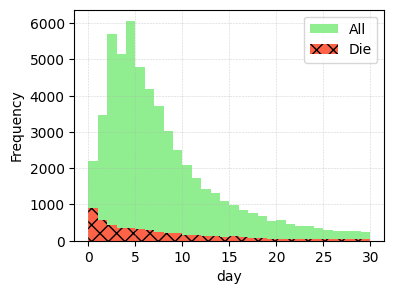

In [27]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.hist(df_admissions.STAYTIME.values, bins=30, range=(0, 30), histtype='stepfilled', color='lightgreen')
ax.hist(df_admissions[df_admissions.DEATHTIME.notnull()].STAYTIME.values, bins=30, range=(0, 30), histtype='stepfilled', color='tomato', hatch='xx')
ax.set_ylabel("Frequency")
ax.set_xlabel("day")
ax.grid(True, linestyle=':', linewidth=.41)
ax.legend(["All", "Die"])
# fig.suptitle("Histogram of length of admission stay")

## other categorical variables

In [6]:
df_admissions.ADMISSION_TYPE.value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [7]:
df_admissions.ADMISSION_LOCATION.value_counts()

EMERGENCY ROOM ADMIT         22754
PHYS REFERRAL/NORMAL DELI    15079
CLINIC REFERRAL/PREMATURE    12032
TRANSFER FROM HOSP/EXTRAM     8456
TRANSFER FROM SKILLED NUR      273
** INFO NOT AVAILABLE **       204
HMO REFERRAL/SICK              102
TRANSFER FROM OTHER HEALT       71
TRSF WITHIN THIS FACILITY        5
Name: ADMISSION_LOCATION, dtype: int64

In [8]:
df_admissions.DISCHARGE_LOCATION.value_counts()

HOME                         18962
HOME HEALTH CARE             13963
SNF                           7705
REHAB/DISTINCT PART HOSP      6429
DEAD/EXPIRED                  5854
LONG TERM CARE HOSPITAL       2305
SHORT TERM HOSPITAL           1534
DISC-TRAN CANCER/CHLDRN H      669
DISCH-TRAN TO PSYCH HOSP       446
HOSPICE-HOME                   402
LEFT AGAINST MEDICAL ADVI      365
HOSPICE-MEDICAL FACILITY       153
HOME WITH HOME IV PROVIDR       67
OTHER FACILITY                  63
ICF                             47
DISC-TRAN TO FEDERAL HC         11
SNF-MEDICAID ONLY CERTIF         1
Name: DISCHARGE_LOCATION, dtype: int64

In [9]:
df_admissions.INSURANCE.value_counts()

Medicare      28215
Private       22582
Medicaid       5785
Government     1783
Self Pay        611
Name: INSURANCE, dtype: int64

In [10]:
df_admissions.LANGUAGE.value_counts()

ENGL    29086
SPAN     1083
RUSS      790
PTUN      628
CANT      413
        ...  
*PER        1
*PUN        1
*BOS        1
*DEA        1
* FU        1
Name: LANGUAGE, Length: 75, dtype: int64

In [11]:
df_admissions.RELIGION.value_counts()

CATHOLIC                  20606
NOT SPECIFIED             11753
UNOBTAINABLE               8269
PROTESTANT QUAKER          7134
JEWISH                     5314
OTHER                      2696
EPISCOPALIAN                774
GREEK ORTHODOX              459
CHRISTIAN SCIENTIST         429
BUDDHIST                    267
MUSLIM                      225
JEHOVAH'S WITNESS           139
UNITARIAN-UNIVERSALIST      124
HINDU                       113
ROMANIAN EAST. ORTH          83
7TH DAY ADVENTIST            81
BAPTIST                      28
HEBREW                       16
METHODIST                     7
LUTHERAN                      1
Name: RELIGION, dtype: int64

In [13]:
df_admissions.MARITAL_STATUS.value_counts()

MARRIED              24239
SINGLE               13254
WIDOWED               7211
DIVORCED              3213
SEPARATED              571
UNKNOWN (DEFAULT)      345
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

In [14]:
df_admissions.ETHNICITY.value_counts()

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

---

# DIAGNOSES_ICD

In [5]:
df_diagnoses_icd = pd.read_csv(os.path.join(path_dataset, "DIAGNOSES_ICD.csv.gz"))
df_diagnoses_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [13]:
df_diagnoses_icd.ICD9_CODE.value_counts()

4019     20703
4280     13111
42731    12891
41401    12429
5849      9119
         ...  
V8709        1
5931         1
63310        1
0849         1
81504        1
Name: ICD9_CODE, Length: 6984, dtype: int64

## icd-9 entry number per hadm_id

mean: 11.03918543136191 
 std: 6.466180243627583


<AxesSubplot:title={'center':'ICD-9 entry number per hadm_id'}, ylabel='Frequency'>

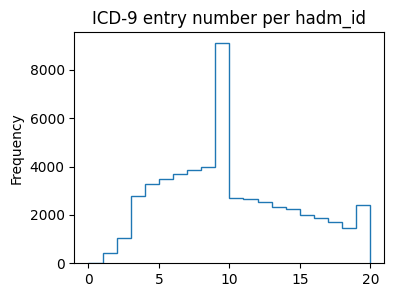

In [15]:
ser_icd9_entry_number_per_hadm_id = df_diagnoses_icd.groupby('HADM_ID').apply(lambda x: x.shape[0])
print(f"mean: {ser_icd9_entry_number_per_hadm_id.mean()}", "\n", f"std: {ser_icd9_entry_number_per_hadm_id.std()}")
ser_icd9_entry_number_per_hadm_id.plot(
    kind='hist', bins=20, range=(0, 20), histtype="step", figsize=(4, 3), title="ICD-9 entry number per hadm_id")

---
# D_LABITEMS

In [15]:
df_d_labitems = pd.read_csv(os.path.join(path_dataset, "D_LABITEMS.csv.gz"))
df_d_labitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ROW_ID      753 non-null    int64 
 1   ITEMID      753 non-null    int64 
 2   LABEL       753 non-null    object
 3   FLUID       753 non-null    object
 4   CATEGORY    753 non-null    object
 5   LOINC_CODE  585 non-null    object
dtypes: int64(2), object(4)
memory usage: 35.4+ KB


In [7]:
df_d_labitems.head()

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN


In [16]:
df_d_labitems.FLUID.value_counts()

Blood                        359
Urine                        103
Other Body Fluid              82
Bone Marrow                   40
Ascites                       37
Pleural                       35
Cerebrospinal Fluid (CSF)     30
Joint Fluid                   26
BLOOD                         15
OTHER BODY FLUID               9
Stool                          6
URINE                          6
JOINT FLUID                    2
ASCITES                        1
STOOL                          1
CSF                            1
Name: FLUID, dtype: int64

In [9]:
df_d_labitems.CATEGORY.value_counts()

Hematology    410
Chemistry     274
Blood Gas      34
CHEMISTRY      19
HEMATOLOGY     13
BLOOD GAS       3
Name: CATEGORY, dtype: int64

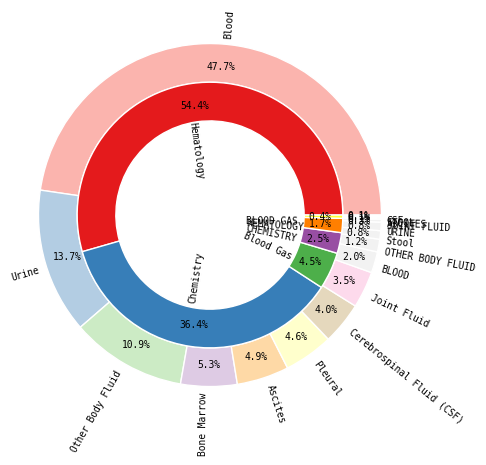

In [157]:
fig, ax = plt.subplots()

size = 0.3
radius = 1.33

outer_cmap = plt.colormaps["Pastel1"]
outer_colors = outer_cmap(np.arange(len(df_d_labitems.FLUID.value_counts())))
inner_cmap = plt.colormaps["Set1"]
inner_colors = inner_cmap(np.arange(len(df_d_labitems.CATEGORY.value_counts())))

ax.pie(df_d_labitems.FLUID.value_counts().values, 
       labels=df_d_labitems.FLUID.value_counts().index, labeldistance=1.03, rotatelabels=True, 
       radius=radius, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), 
       autopct="%1.1f%%", pctdistance=0.87, 
       textprops=dict(fontfamily="monospace", fontsize="x-small"))

ax.pie(df_d_labitems.CATEGORY.value_counts().values, 
       labels=df_d_labitems.CATEGORY.value_counts().index, labeldistance=0.27, rotatelabels=True, 
       radius=radius-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), 
       autopct="%1.1f%%", pctdistance=0.83, 
       textprops=dict(fontfamily="monospace", fontsize="x-small"))

# ax.set(aspect="equal", title='Pie plot with `ax.pie`')

plt.tight_layout()
plt.show()
fig.savefig("/data/data2/041/LERS/results/item_categories")

---
# LABEVENTS

In [28]:
df_labevents = pd.read_csv(os.path.join(path_dataset, "LABEVENTS.csv.gz"))
df_labevents.dropna(subset=['HADM_ID', 'ITEMID'], inplace=True)
df_labevents.sort_values(by=["HADM_ID", "ITEMID"], inplace=True)
df_labevents["CHARTTIME"] = pd.to_datetime(df_labevents["CHARTTIME"], format="%Y-%m-%d %H:%M:%S")  # Convert columns to datetime
df_labevents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22245034 entries, 22704987 to 19982158
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ROW_ID      int64         
 1   SUBJECT_ID  int64         
 2   HADM_ID     float64       
 3   ITEMID      int64         
 4   CHARTTIME   datetime64[ns]
 5   VALUE       object        
 6   VALUENUM    float64       
 7   VALUEUOM    object        
 8   FLAG        object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.7+ GB


In [29]:
df_labevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
22704987,22441088,58526,100001.0,50813,2117-09-11 08:32:00,1.9,1.9,mmol/L,NaN
22695648,22441061,58526,100001.0,50861,2117-09-11 08:22:00,10,10.0,IU/L,NaN
22695649,22441062,58526,100001.0,50863,2117-09-11 08:22:00,105,105.0,IU/L,NaN
22601483,22441320,58526,100001.0,50868,2117-09-17 05:45:00,14,14.0,mEq/L,NaN
22695650,22441063,58526,100001.0,50868,2117-09-11 08:22:00,30,30.0,mEq/L,abnormal


## Item frequency distribution

In [37]:
ser_items_count = df_labevents.ITEMID.value_counts() / len(df_labevents)
ser_items_count

51221    3.118844e-02
50971    3.011369e-02
50983    2.885466e-02
50902    2.839636e-02
50912    2.785440e-02
             ...     
51477    4.495385e-08
51019    4.495385e-08
51253    4.495385e-08
50834    4.495385e-08
51327    4.495385e-08
Name: ITEMID, Length: 710, dtype: float64

In [42]:
df_items_count = pd.DataFrame({
    "ITEMID": ser_items_count.index,
    "PERCENTAGE": ser_items_count.values
})
df_items_count

,ITEMID,PERCENTAGE
0,51221,3.118844e-02
1,50971,3.011369e-02
2,50983,2.885466e-02
3,50902,2.839636e-02
4,50912,2.785440e-02
...,...,...
705,51477,4.495385e-08
706,51019,4.495385e-08
707,51253,4.495385e-08
708,50834,4.495385e-08


In [46]:
df_items_count_with_label = df_items_count.merge(df_d_labitems[["ITEMID", "LABEL"]], how='left', on='ITEMID')
df_items_count_with_label

,ITEMID,PERCENTAGE,LABEL
0,51221,3.118844e-02,Hematocrit
1,50971,3.011369e-02,Potassium
2,50983,2.885466e-02,Sodium
3,50902,2.839636e-02,Chloride
4,50912,2.785440e-02,Creatinine
...,...,...,...
705,51477,4.495385e-08,Free Fat
706,51019,4.495385e-08,"Albumin, Joint Fluid"
707,51253,4.495385e-08,Monocyte Count
708,50834,4.495385e-08,"Sodium, Body Fluid"


In [50]:
df_items_count_with_label_top50 = df_items_count_with_label[:50]
df_items_count_with_label_top50

,ITEMID,PERCENTAGE,LABEL
0,51221,0.031188,Hematocrit
1,50971,0.030114,Potassium
2,50983,0.028855,Sodium
3,50902,0.028396,Chloride
4,50912,0.027854,Creatinine
5,50882,0.027809,Bicarbonate
6,51006,0.027749,Urea Nitrogen
7,50868,0.027348,Anion Gap
8,51265,0.026926,Platelet Count
9,50931,0.026776,Glucose


In [51]:
df_items_count_with_label_top50.PERCENTAGE.sum()

0.8456557989527012

In [52]:
1 - df_items_count_with_label_top50.PERCENTAGE.sum()

0.15434420104729885

In [53]:
df_items_count_with_label_top50.loc[len(df_items_count_with_label_top50)] = ['00000', 1 - df_items_count_with_label_top50.PERCENTAGE.sum(), 'Outsides top50']
df_items_count_with_label_top50

/data/data2/041/envs/LERS2/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,ITEMID,PERCENTAGE,LABEL
0,51221,0.031188,Hematocrit
1,50971,0.030114,Potassium
2,50983,0.028855,Sodium
3,50902,0.028396,Chloride
4,50912,0.027854,Creatinine
5,50882,0.027809,Bicarbonate
6,51006,0.027749,Urea Nitrogen
7,50868,0.027348,Anion Gap
8,51265,0.026926,Platelet Count
9,50931,0.026776,Glucose


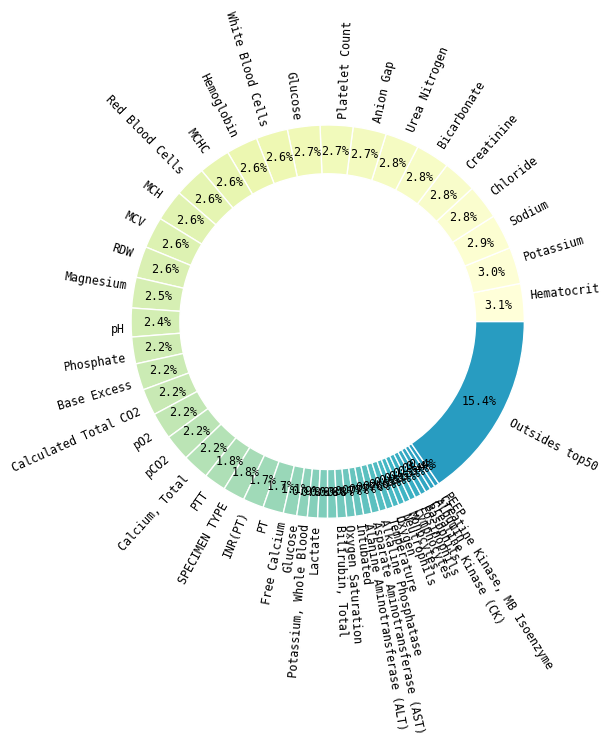

In [152]:
fig, ax = plt.subplots()

size = 0.33
radius = 1.33

cmap = plt.colormaps["YlGnBu"]
colors = cmap(np.arange(len(df_items_count_with_label_top50))*3)

ax.pie(df_items_count_with_label_top50.PERCENTAGE.values, 
       labels=df_items_count_with_label_top50.LABEL.values, labeldistance=1.03, rotatelabels=True, 
       radius=radius, colors=colors, wedgeprops=dict(width=size, edgecolor='w'), 
       autopct="%1.1f%%", pctdistance=0.87, 
       textprops=dict(fontfamily="monospace", fontsize="small"))

plt.show()
fig.savefig("/data/data2/041/LERS/results/top50_items")

## Map of top50

In [136]:
unique_item_id = df_d_labitems.ITEMID.sort_values().unique()
unique_item_id = pd.DataFrame(data={
    'ITEMID': unique_item_id,
    'mappedID': pd.RangeIndex(len(unique_item_id)),
})
unique_item_id

,ITEMID,mappedID
0,50800,0
1,50801,1
2,50802,2
3,50803,3
4,50804,4
...,...,...
748,51551,748
749,51552,749
750,51553,750
751,51554,751


In [137]:
unique_item_id[unique_item_id.ITEMID.isin(df_items_count_with_label_top50.ITEMID)]

,ITEMID,mappedID
0,50800,0
2,50802,2
4,50804,4
8,50808,8
9,50809,9
12,50812,12
13,50813,13
16,50816,16
17,50817,17
18,50818,18


In [147]:
unique_item_id[unique_item_id.ITEMID.isin(df_items_count_with_label_top50.ITEMID)].mappedID.values

array([  0,   2,   4,   8,   9,  12,  13,  16,  17,  18,  19,  20,  21,
        22,  25,  61,  62,  63,  68,  78,  82,  85,  93, 102, 110, 111,
       112, 131, 160, 170, 171, 183, 205, 345, 399, 420, 421, 436, 443,
       447, 448, 449, 453, 455, 464, 473, 474, 476, 478, 500])

# PRESCRIPTIONS

In [4]:
df_prescriptions = pd.read_csv(os.path.join(path_dataset, "PRESCRIPTIONS_PREPROCESSED.csv.gz"))
df_prescriptions.head()

/data/data2/041/envs/LERS2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,...,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE,TIMESTEP
0,0,102562,492937,3951837,89132,198797,NaN,2151-06-27,2151-06-28,1,...,CYAN500,2341.0,8.770107e+10,1,1.0,11.0,1,1.0,3,0.0
1,1,245100,492946,3951840,89132,198797,NaN,2151-06-27,2151-06-28,1,...,CARA1,2766.0,6.373903e+10,1,1.0,4.0,1,1.0,3,0.0
2,2,1671716,11792392,3951836,89132,198797,NaN,2151-06-27,2151-06-28,1,...,ATEN25,15864.0,5.107908e+10,1,2.0,1.0,2,1.0,3,0.0
3,3,1835301,11792393,3951835,89132,198797,NaN,2151-06-27,2151-06-28,1,...,ALLO100,2535.0,5.107902e+10,1,1.0,1.0,1,1.0,3,0.0
4,4,2083587,492934,3951834,89132,198797,NaN,2151-06-27,2151-06-28,1,...,PRAV20,16367.0,5.107905e+10,1,1.0,1.0,1,1.0,2,0.0
